# *Section 3&4 uses openCV, Section 1&2 do not
.................................................................................................................................................................
# Allen Ben Philipose (18BIS0043)
# CSE4019 - Digital Assignment
.................................................................................................................................................................
### - Please run everything Sequentially. 
### - Explanations and references are given
### - Click "esc" button to stop execution
### - Github: https://github.com/allenalvin333/College_Mini/blob/master/4.%20CSE4019%20-%20DIP/DA1.ipynb
### - Drive: https://drive.google.com/drive/folders/1Bs9bVeXcoZVqZwF9fE4vzPQh3yGZzU4S?usp=sharing
.................................................................................................................................................................


# I. Basic manipulation of Images


### Pillow Library

In [128]:
import PIL
from IPython.display import Image
from IPython.display import display
from matplotlib import image
from matplotlib import pyplot

In [129]:
from PIL import Image
image = Image.open('Outputs/demo.png')
print(image.format)
print(image.size)
print(image.mode)

PNG
(1200, 900)
RGBA


### Matplotlib Library

(900, 1200, 4)


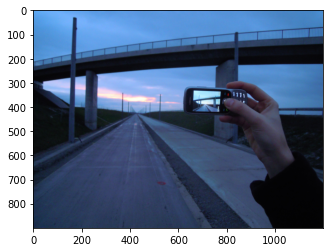

In [130]:
from matplotlib import image
from matplotlib import pyplot
image = image.imread('Outputs/demo.png')
print(image.shape)
pyplot.imshow(image)
pyplot.show()

### Print Information

In [131]:
from PIL import Image
from numpy import asarray
image = Image.open('Outputs/demo.png')
data = asarray(image)
print(type(data))
print(data.shape)
image2 = Image.fromarray(data)
print(type(image2))
print(image2.mode)
print(image2.size)

<class 'numpy.ndarray'>
(900, 1200, 4)
<class 'PIL.Image.Image'>
RGBA
(1200, 900)


In [132]:
print(data) # The matrix form of the image

[[[ 96 171 247 255]
  [ 95 169 244 255]
  [ 94 169 243 255]
  ...
  [ 75 141 211 255]
  [ 76 140 211 255]
  [ 75 141 207 255]]

 [[ 95 171 244 255]
  [ 94 170 243 255]
  [ 94 171 242 255]
  ...
  [ 75 140 209 255]
  [ 78 143 211 255]
  [ 76 143 209 255]]

 [[ 92 172 239 255]
  [ 94 172 240 255]
  [ 96 172 241 255]
  ...
  [ 76 139 205 255]
  [ 77 141 209 255]
  [ 78 143 209 255]]

 ...

 [[ 31  39  77 255]
  [ 26  34  71 255]
  [ 29  41  76 255]
  ...
  [  3   3   5 255]
  [  4   4   6 255]
  [  3   3   5 255]]

 [[ 31  33  67 255]
  [ 30  33  66 255]
  [ 27  37  69 255]
  ...
  [  3   3   5 255]
  [  4   4   6 255]
  [  4   4   6 255]]

 [[ 30  38  48 255]
  [ 30  37  55 255]
  [ 31  40  70 255]
  ...
  [  4   4   6 255]
  [  5   5   7 255]
  [  3   3   5 255]]]


### Conversion to Grayscale - I

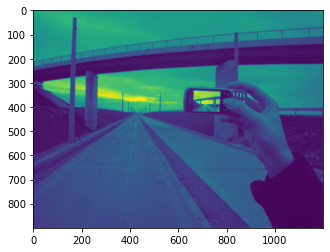

In [32]:
from PIL import Image
import numpy as np

im = np.array(Image.open('Outputs/demo.png').convert('L')) 
gr_im = Image.fromarray(im).save('Outputs/demo1a.png')
image = Image.fromarray(im)
pyplot.imshow(image)
pyplot.show() 

# There is some error in pyplot
# Hence using display function from IPython

# display(Image.open("Outputs/demo1a.png"))

### Conversion to Grayscale - II

In [33]:
import numpy as npy 
import matplotlib.image as image 
from statistics import mean  
  
im = image.imread("Outputs/demo.png") 
n = npy.zeros([im.shape[0],im.shape[1], 4])   
for i in range(im.shape[0]): 
    for j in range(im.shape[1]): 
        l = [float(im[i][j][0]), float(im[i][j][1]), float(im[i][j][2])] 
        average = float(mean(l)) 
        n[i][j][0] = average 
        n[i][j][1] = average 
        n[i][j][2] = average 
        n[i][j][3] = 1

image.imsave('Outputs/demo1b.png', n) 
# display(Image.open("Outputs/demo1b.png"))

### Resizing

After resizing: (200, 200, 4)


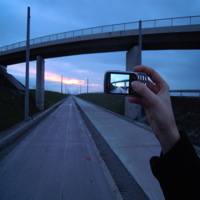

In [203]:
l = np.array(Image.open('Outputs/demo.png').resize((200,200)))
Image.fromarray(l).save('Outputs/demo2.png')
print("After resizing:",l.shape)
display(Image.open("Outputs/demo2.png"))

### Trimming

Before trimming: (900, 1200, 4)
After trimming: (250, 350, 4)


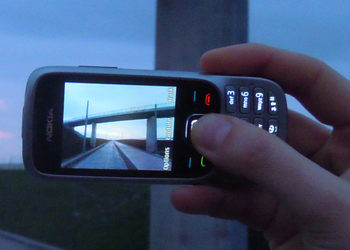

In [204]:
im = np.array(Image.open('Outputs/demo.png'))
print("Before trimming:",im.shape)
t = im[250:500, 600:950]
print("After trimming:",t.shape)

Image.fromarray(t).save('Outputs/demo3.png')
display(Image.open("Outputs/demo3.png"))

# II. Edge detection - from Image

### Import Libraries

In [34]:
from scipy import misc
from scipy import ndimage as nd
import numpy as np
import matplotlib.pyplot as plt
import imageio as io

### Use the grayscaled image obtained earlier

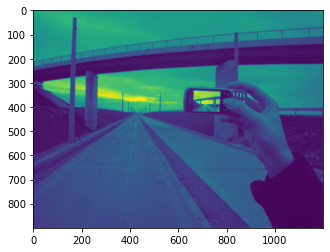

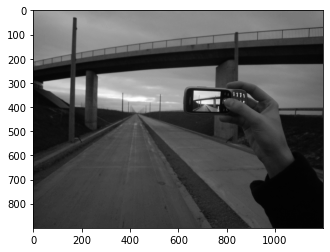

In [35]:
image1 = np.array(Image.open('Outputs/demo1a.png'))
image = io.imread("Outputs/demo1a.png")
image = image.astype('int32')
plt.imshow(image)
plt.show()
plt.imshow(image, cmap = plt.get_cmap('gray'))
plt.show()

Image.fromarray(image1).save('Outputs/E1.png')
# display(Image.open("Outputs/E1.png"))

### Gaussian Filter

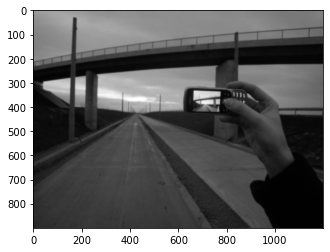

In [36]:
g = nd.gaussian_filter(image, sigma = 1.4) # g - Gaussian filtered image
g1 = nd.gaussian_filter(image1, sigma = 1.4)
plt.imshow(g, cmap = plt.get_cmap('gray'))
plt.show()

Image.fromarray(g1).save('Outputs/E2.png')
# display(Image.open("Outputs/E2.png"))

### Sobel Filter

In [37]:
def Sobel(i, d):
    Res = 0
    if(d == 1):
        x = np.array([[-1,0,1], [-2,0,2],  [-1,0,1]])
        Res = nd.convolve(i, x)
        # np.expand_dims(Gx, axis=0)
    if(d == 0):
        y = np.array([[-1,-2,-1], [0,0,0], [1,2,1]])
        Res = nd.convolve(i, y)
    return Res

### Normalization Function

In [38]:
def Normalization(i):
    im = i/np.max(i)
    return im

### Apply filters in both directions

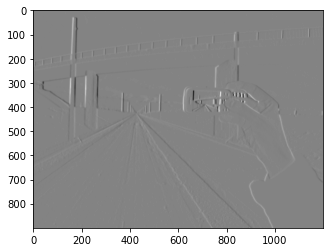

In [39]:
x = Sobel(g,1)
x = Normalization(x)
plt.imshow(x, cmap = plt.get_cmap('gray'))
plt.show()

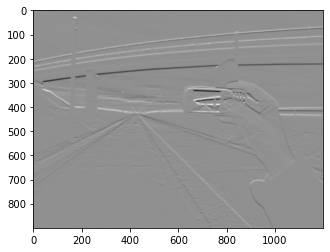

In [40]:
y = Sobel(g,0)
y = Normalization(y)
plt.imshow(y, cmap = plt.get_cmap('gray'))
plt.show()

### Take derivatives in both directions

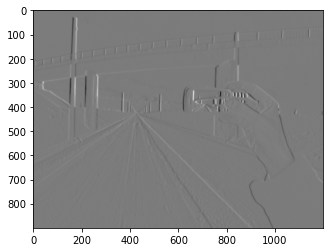

In [41]:
dx = nd.sobel(g,1) 
# Horizontal derivative from a pre-defined function
# from ndimage class in scipy library 
plt.imshow(dx, cmap = plt.get_cmap('gray'))
plt.show()

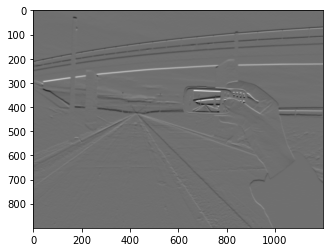

In [42]:
dy = nd.sobel(g,0) 
# Vertical derivative from a pre-defined function
# from ndimage class in scipy library
plt.imshow(dy, cmap = plt.get_cmap('gray'))
plt.show()

### Output

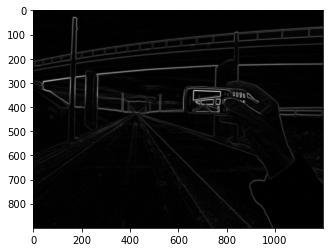

In [43]:
i = np.hypot(x,y)
plt.imshow(i, cmap = plt.get_cmap('gray'))
plt.show()

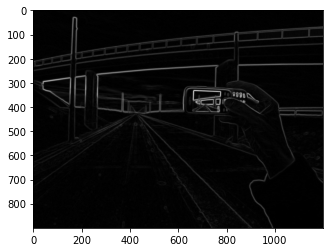

In [44]:
j = np.hypot(dx,dy)
plt.imshow(j, cmap = plt.get_cmap('gray'))
plt.show()

### Explanation

In [232]:
# covert('L') - Dithering function essential for grayscaling by pillow module
# https://www.geeksforgeeks.org/python-pil-image-convert-method/

# cmap = plt.get_cmap('gray')
# This parameter had to be included to maintain the grayscale image

# convolve(a,b) - a(*)b
# .imshow() - for plotting values, from matplotlib
# .open(), .save(), .imread(), .show(), .max() - self explanatory
# .astype(Required data type and size)

# .gaussian_filter(image input, sigma) - Sigma is the standard deviation for Gaussian kernel
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.gaussian_filter.html

# .sobel(image input, axis) - The axis of input along which to calculate. Default is -1.
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.sobel.html

# .hyp(x,y) = sqrt(x**2+y**2)
# https://docs.scipy.org/doc/numpy-1.9.0/reference/generated/numpy.hypot.html

# III. Canny Edge Detection - from camera

### Import Libraries

In [30]:
import cv2  
import numpy as np 
import PIL
from PIL import Image
from IPython.display import display
# i -> input, o -> output
# l and u are the threshold limits

### Process Unit

In [58]:
cap = cv2.VideoCapture(0) # Direct Capturing
while(1): 
    ret, i = cap.read() 
    cv2.imshow('Input',i) 
    o = cv2.Canny(i,100,200) 
    cv2.imshow('Output',o) 

    k = cv2.waitKey(5) & 0xFF
    if k == 27: 
        break

cap.release() 
cv2.destroyAllWindows()  

### Example Output

In [45]:
# display(Image.open("Outputs/A1.png"))

### Explanation

In [164]:
# .canny(image input, lower threshold, upper threshold) - Thresholds of the hysteresis procedure
# https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_canny/py_canny.html
# This is an openCV function

# im[vertical range, horizontal range] - For cropping the images

# .imshow('Title of the window', image input) - For video output frames
# https://www.geeksforgeeks.org/matplotlib-pyplot-imshow-in-python/

# IV. Canny Edge Detection - from video

### Import Libraries

In [34]:
import cv2
import numpy as np
cap = cv2.VideoCapture('demo.mp4')
if (cap.isOpened()== False): 
  print("Enter a Valid Path")

### Displaying the grayscaled video

In [35]:
while(cap.isOpened()):
  ret, i = cap.read()
  if ret == True:
    g = cv2.cvtColor(i, cv2.COLOR_BGR2GRAY)
    cv2.imshow('Input', g)
    
    k = cv2.waitKey(5) & 0xFF
    if k == 27: 
        break
  else: 
    break
cap.release()
cv2.destroyAllWindows()

In [46]:
# display(Image.open("Outputs/A2.png")) # Example Output

### Detection - Low Threshold

In [37]:
cap = cv2.VideoCapture('demo.mp4') # From a video in local
while(1): 
    ret, i = cap.read() 
    edgl = cv2.Canny(i, 15, 25)
    cv2.imshow('Low Threshold', edgl)
    
    k = cv2.waitKey(5) & 0xFF
    if k == 27: 
        break

cap.release() 
cv2.destroyAllWindows()  

In [47]:
# display(Image.open("Outputs/A3.png")) # Example Output

### Detection - High Threshold

In [39]:
cap = cv2.VideoCapture('demo.mp4') # From a video in local
while(1): 
    ret, i = cap.read() 
    edgh = cv2.Canny(i, 70, 140)
    cv2.imshow('High Threshold', edgh)

    k = cv2.waitKey(5) & 0xFF
    if k == 27: 
        break

cap.release() 
cv2.destroyAllWindows()  

In [48]:
# display(Image.open("Outputs/A4.png")) # Example Output

### Detection - Bilateral Filtering

In [42]:
cap = cv2.VideoCapture('demo.mp4') # From a video in local
while(1): 
    ret, i = cap.read() 
    # g1 is original and g2 is smoothened by bilateral filter
    g1 = cv2.cvtColor(i, cv2.COLOR_BGR2GRAY)
    g2 = cv2.bilateralFilter(g1, 5, 50, 50)
    bf = cv2.Canny(g2, 80, 160)
    cv2.imshow('Bilateral Filtering', bf)

    k = cv2.waitKey(5) & 0xFF
    if k == 27: 
        break

cap.release() 
cv2.destroyAllWindows()  

In [49]:
# display(Image.open("Outputs/A5.png")) # Example Output

### Detection - Morphological Operations

In [46]:
cap = cv2.VideoCapture('demo.mp4') # From a video in local
fgbg = cv2.createBackgroundSubtractorMOG2(
    history=10,
    varThreshold=2,
    detectShadows=False)

while(1): 
    ret, i = cap.read() 
    # g1 is original and g2 is smoothened by bilateral filter
    g1 = cv2.cvtColor(i, cv2.COLOR_BGR2GRAY)
    g2 = cv2.bilateralFilter(g1, 9, 75, 75)
    fg = fgbg.apply(g2)
    edgf = cv2.Canny(g2, 65, 130)
    
    # Smooth out to get the moving area
    kernel = np.ones((50,50),np.uint8)
    fg1 = cv2.morphologyEx(fg, cv2.MORPH_CLOSE, kernel)
    
    # Crop off the edges out of the moving area
    c = (fg1 // 255) * edgf
    cv2.imshow('Morphological Closing', c)
    
    k = cv2.waitKey(5) & 0xFF
    if k == 27: 
        break

cap.release() 
cv2.destroyAllWindows()  

In [50]:
# display(Image.open("Outputs/A6.png")) # Example Output

### Explanation

In [77]:
# cvtColor(image input, format) - For changing colour format of the image

# Image.open("image path") - For Collecting the image from that path
# display() - For giving the image as an output

# .bilateralFilter(image input, diameter, sigmaColour, sigmaSpace) - For smoothening 
# https://www.tutorialspoint.com/opencv/opencv_bilateral_filter.htm

# .morphologyEx(image input, cv2.MORPH_CLOSE, kernel) - For performing morphological closing 
# This expression makes the input go through dilation followed by erosion, using the kernel
# https://docs.opencv.org/master/d9/d61/tutorial_py_morphological_ops.html

# .createBackgroundSubtractorMOG2 - is a user defined function for motion detection
# https://docs.opencv.org/master/d6/d17/group__cudabgsegm.html

# General References

In [44]:
# https://medium.com/sicara/opencv-edge-detection-tutorial-7c3303f10788
# https://www.sicara.ai/blog/2019-03-12-edge-detection-in-opencv
# https://www.quora.com/How-do-I-set-the-upper-and-lower-threshold-in-canny-edge-detection
# https://docs.opencv.org/master/da/d22/tutorial_py_canny.html
# https://www.geeksforgeeks.org/real-time-edge-detection-using-opencv-python/
# https://www.pluralsight.com/guides/importing-image-data-into-numpy-arrays
# https://stackoverflow.com/questions/29434533/edge-detection-for-image-stored-in-matrix
# https://www.geeksforgeeks.org/erosion-dilation-images-using-opencv-python/
# https://www.youtube.com/watch?v=qHn9mctee1Q